In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [4]:
train_df = pd.read_csv('data/mnist_train.csv')
test_df = pd.read_csv('data/mnist_test.csv')


In [5]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_df = np.array(train_df,dtype='float32')
test_df = np.array(test_df,dtype='float32')
x_train =  train_df[:,1:] /255
y_train =  train_df[:,0]

x_test =  test_df[:,1:] /255
y_test =  test_df[:,0]

In [7]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state=12345)

In [8]:
image_sample = x_test[300].reshape(28,28) #reshape into current dimension


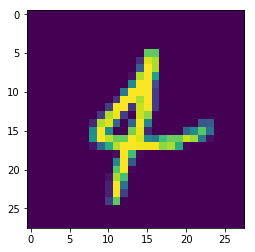

In [9]:
plt.imshow(image_sample)
plt.show()

# Create CNN Model

In [10]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape:{}'.format(x_train.shape))
print('x_test shape:{}'.format(x_test.shape))
print('x_validate shape:{}'.format(x_validate.shape))


x_train shape:(48000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)
x_validate shape:(12000, 28, 28, 1)


In [23]:
name = 'model_1'
cnn_model_1 = Sequential([
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=3, name='MaxPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    MaxPooling2D(pool_size=1, name='MaxPool-2'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(64, activation='relu', name='Dense_3'),
    Dense(10, activation='softmax', name='Output')
    
],name=name)

name = 'model_2'
cnn_model_2 = Sequential([
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    AveragePooling2D(pool_size=3, name='avgPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=1, name='AvgPool-2'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(64, activation='relu', name='Dense_3'),
    Dense(10, activation='softmax', name='Output')
    
],name=name)

"""name = 'model_3'
cnn_model_3 = Sequential([
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=3, name='maxPool-1'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-2'),
    AveragePooling2D(pool_size=1, name='avgPool-1'),
    Conv2D(filters=64, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-3'),
    MaxPooling2D(pool_size=3, name='maxPool-2'),
    Conv2D(filters=128, kernel_size=1, activation='relu', input_shape = im_shape, name='Conv2D-4'),
    AveragePooling2D(pool_size=1, name='avgPool-2'),
    #Dropout(0.2, name='Dropout'),
    Flatten(name='Flatten'),
    Dense(128, activation='relu', name='Dense_1'),
    Dense(128, activation='relu', name='Dense_2'),
    Dense(64, activation='relu', name='Dense_3'),
    Dense(2, activation='softmax', name='Output')
],name=name)"""

cnn_models = [cnn_model_1, cnn_model_2]
              #cnn_model_3]

In [25]:
im_shape

(28, 28, 1)

In [24]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 28, 28, 64)        128       
_________________________________________________________________
MaxPool-1 (MaxPooling2D)     (None, 9, 9, 64)          0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 9, 9, 128)         8320      
_________________________________________________________________
MaxPool-2 (MaxPooling2D)     (None, 9, 9, 128)         0         
_________________________________________________________________
Dropout (Dropout)            (None, 9, 9, 128)         0         
_________________________________________________________________
Flatten (Flatten)            (None, 10368)             0         
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               1327232   
__________

In [26]:
history_dict = {}
for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer = Adam(),
        metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=10, verbose=True,
        validation_data=(x_validate, y_validate))
    history_dict[model.name] = history
    


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 48s 999us/step - loss: 0.6686 - acc: 0.7996 - val_loss: 0.3660 - val_acc: 0.8868
Epoch 2/10
48000/48000 [==============================] - 48s 994us/step - loss: 0.3400 - acc: 0.8942 - val_loss: 0.3076 - val_acc: 0.9032
Epoch 3/10
48000/48000 [==============================] - 46s 959us/step - loss: 0.2838 - acc: 0.9109 - val_loss: 0.2758 - val_acc: 0.9127
Epoch 4/10
48000/48000 [==============================] - 45s 937us/step - loss: 0.2424 - acc: 0.9235 - val_loss: 0.2211 - val_acc: 0.9303
Epoch 5/10
48000/48000 [==============================] - 45s 937us/step - loss: 0.2152 - acc: 0.9309 - val_loss: 0.2249 - val_acc: 0.9297
Epoch 6/10
48000/48000 [==============================] - 45s 946us/step - loss: 0.1997 - acc: 0.9352 - val_loss: 0.2020 - val_acc: 0.9383
Epoch 7/10
48000/48000 [==============================] - 46s 963us/step - loss: 0.1840 - acc: 0.9410 - val_loss: 0.

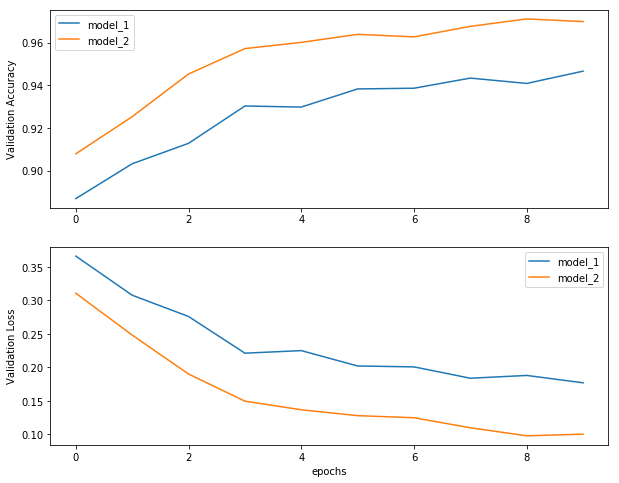

In [27]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 8))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [28]:
score = cnn_model_1.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


10000/10000 [==============================] - 2s 207us/step
Test Loss : 0.1729
Test Acc  : 0.9447


In [68]:
score = cnn_model_1.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))

4433/4433 [==============================] - 1s 202us/step
Train Loss : 0.2474
Train Acc  : 0.8928


In [29]:
score = cnn_model_2.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


10000/10000 [==============================] - 2s 204us/step
Test Loss : 0.0879
Test Acc  : 0.9712


In [69]:
score = cnn_model_2.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))

4433/4433 [==============================] - 1s 194us/step
Train Loss : 0.3098
Train Acc  : 0.8676


In [14]:
score = cnn_model_3.evaluate(x_test, y_test, verbose=1)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Acc  : {:.4f}'.format(score[1]))


624/624 [==============================] - 0s 222us/step
Test Loss : 0.5553
Test Acc  : 0.7644


In [70]:
score = cnn_model_3.evaluate(x_train, y_train, verbose=1)
print('Train Loss : {:.4f}'.format(score[0]))
print('Train Acc  : {:.4f}'.format(score[1]))


4433/4433 [==============================] - 1s 195us/step
Train Loss : 0.2590
Train Acc  : 0.8949


In [30]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
# This is used for plotting the images.
img_shape = (img_size, img_size)

# Tuple with height, width and depth used to reshape arrays.
# This is used for reshaping in Keras.
img_shape_full = (img_size, img_size, 1)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 2

#labels = ['Normal\n', 'Pneumonia\n']
labels = [0,1,2,3,4,5,6,7,8,9]


In [36]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 16
    
    # Create figure with 4x4 sub-plots.
    fig, axes = plt.subplots(4, 4)
    fig.subplots_adjust(hspace=1.0, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, \n Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

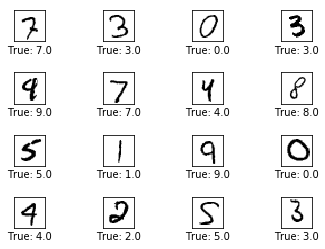

In [44]:
# Get the first images from the test-set.
random_data = np.random.randint(623, size= 16)
images = x_test[random_data]
cls_true = y_test[random_data]
cls_true = cls_true.astype(int)
cls_lbl = []
for i in range(len(cls_true)):
    cls_lbl = np.append(cls_lbl, labels[cls_true[i]])
    
# Get the true classes for those images.
cls_true = y_test[random_data]
# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_lbl)

In [45]:
print(random_data)

[ 41 142 545 382 359   0 519 538 155 504 284 246 571 400 333 531]


#  Model 1 

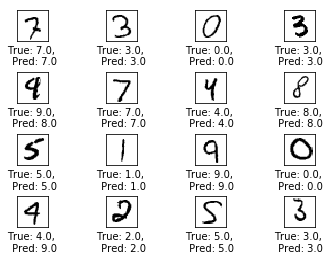

In [46]:

#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_1.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)



# Model 2

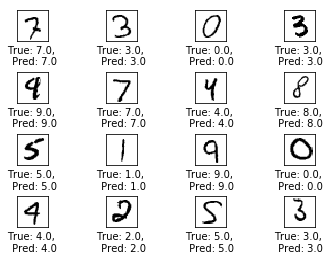

In [47]:
#Predict
#images = x_test[500:516]

images = x_test[random_data]

y_pred = cnn_model_2.predict(x=images) #swicth to model that we use 
cls_pred = np.argmax(y_pred,axis=1)
cls_lbl_pred = []
for i in range(len(y_pred)):
    cls_lbl_pred = np.append(cls_lbl_pred, labels[cls_pred[i]])
    

plot_images(images=images,
            cls_true=cls_lbl,
            cls_pred=cls_lbl_pred)